##### OBJETIVO: Hacer plots con las metricas de las predicciones de ML y comparar los distintos enfoques de cross validation

In [1]:
#Libreria
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Librerias")

Librerias


In [2]:
#Dataset generado manualmente a partir de los resultados obtenidos de cada modelo de ML
# Son metricas de desempeño
data = pd.DataFrame({
    "City": ["SP","SP","SP","SP",
             "ST","ST","ST","ST",
             "BA","BA","BA","BA",
             "MD","MD","MD","MD",
             "MX","MX","MX","MX"],
    "Model": ["SVR","RF","ET","XGB"] * 5,
    "R2": [0.79,0.71,0.72,0.72,
           0.82,0.84,0.83,0.85,
           0.50,0.57,0.59,0.72,
           0.70,0.70,0.70,0.72,
           0.70,0.72,0.72,0.78],
    "RMSE": [6.06,5.94,5.92,5.74,
             7.12,6.66,6.91,6.28,
             7.52,7.04,7.02,4.53,
             4.67,4.75,4.85,4.53,
             5.50,5.41,5.52,5.03],
    "Bias": [-0.68,0.11,0.10,-0.12,
             -0.53,0.12,0.16,0.11,
             -0.37,0.28,-0.30,-0.11,
             -0.38,-0.001,-0.02,-0.11,
             -0.48,0.15,0.18,-0.004]
})
#Orden de las ciudades en todos los plots
city_order = ["SP", "ST", "BA", "MD", "MX"]



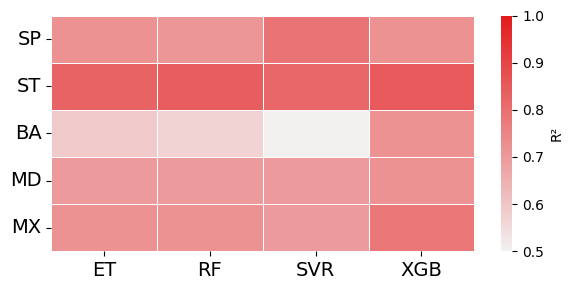

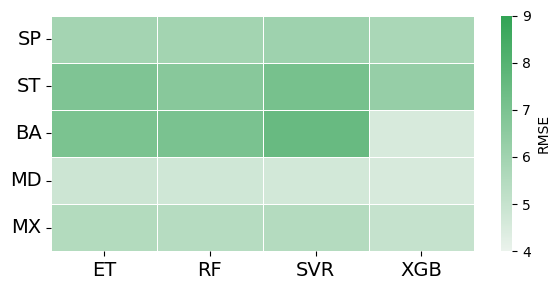

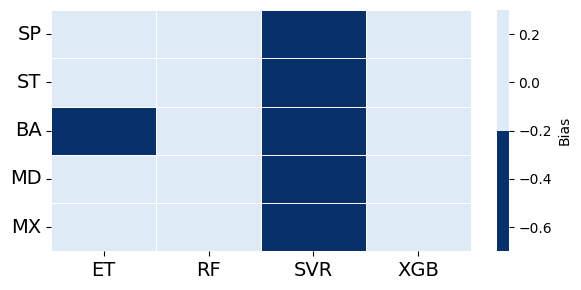

In [25]:
#Mapa del r2 para cada centro urbano
#Filtro de la metrica
heatmap_r2 = (
    data
    .pivot(index="City", columns="Model", values="R2")
    .reindex(city_order)
)
#Plot
plt.figure(figsize=(6, 3))
sns.heatmap(
    heatmap_r2,
    cmap=sns.light_palette("#e31a1c", as_cmap=True),
    vmin=0.5, vmax=1,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "R²"}
)

plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()
##############################################
#Mapa del rmse para cada centro urbano
#Filtro de la metrica

heatmap_rmse = (
    data
    .pivot(index="City", columns="Model", values="RMSE")
    .reindex(city_order)
)

plt.figure(figsize=(6, 3))
sns.heatmap(
    heatmap_rmse,
    cmap=sns.light_palette("#31a354", as_cmap=True),
    vmin=4, vmax=9,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "RMSE"}
)

plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()

####################################################
#Plot del bias
heatmap_bias = (
    data
    .pivot(index="City", columns="Model", values="Bias")
    .reindex(city_order)
)

plt.figure(figsize=(6, 3))
sns.heatmap(
    heatmap_bias,
    cmap=sns.color_palette(["#08306b", "#deebf7"], as_cmap=True),
    vmin=-0.7, vmax=0.3,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Bias"}
)

plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()


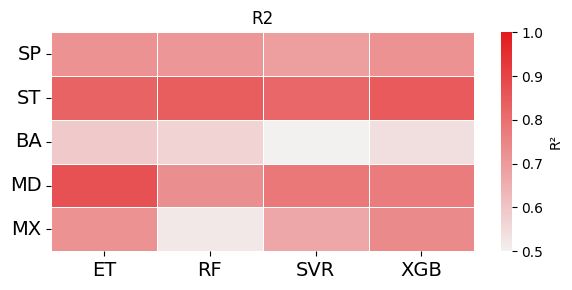

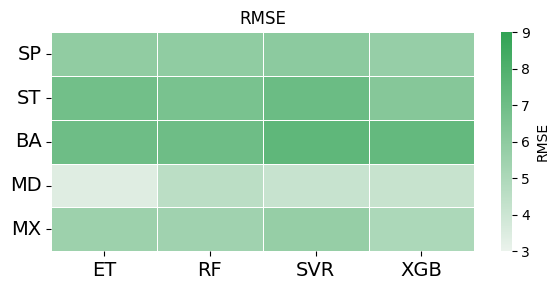

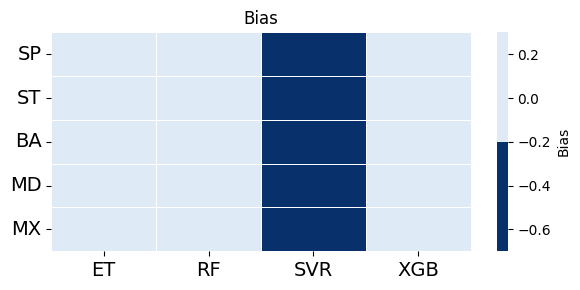

In [7]:
#Similar a lo anterior pero con otros resultados del modelo
#Cross validation aleatorio

data_cv_random = pd.DataFrame({
    "City": ["SP","SP","SP","SP",
             "ST","ST","ST","ST",
             "BA","BA","BA","BA",
             "MD","MD","MD","MD",
             "MX","MX","MX","MX"],
    "Model": ["SVR","RF","ET","XGB"] * 5,
    "R2": [0.69,0.71,0.72,0.72,
           0.82,0.84,0.83,0.85,
           0.50,0.57,0.59,0.54,
           0.78,0.73,0.87,0.77,
           0.67,0.52,0.72,0.74],
    "RMSE": [6.06,5.94,5.92,5.74,
             7.12,6.66,6.91,6.28,
             7.52,7.04,7.02,7.35,
             4.17,4.57,3.40,4.18,
             5.76,5.42,5.52,5.03],
    "Bias": [-0.68,0.11,0.10,-0.11,
             -0.53,0.12,0.16,0.09,
             -0.37,0.28,0.30,0.51,
             -0.44,0.09,0.03,-0.08,
             -0.58,0.15,0.17,0.03]
})
#################################################
#  ------ R2 ------
#### Fultrado de datos
heatmap_r2 = (
    data_cv_random
    .pivot(index="City", columns="Model", values="R2")
    .reindex(city_order)
)
#Plot
plt.figure(figsize=(6, 3))
sns.heatmap(
    heatmap_r2,
    cmap=sns.light_palette("#e31a1c", as_cmap=True),
    vmin=0.5, vmax=1,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "R²"}
)
plt.title("R2")
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()


#################################################
#  ------ RMSE ------

heatmap_rmse = (
    data_cv_random
    .pivot(index="City", columns="Model", values="RMSE")
    .reindex(city_order)
)

plt.figure(figsize=(6, 3))
sns.heatmap(
    heatmap_rmse,
    cmap=sns.light_palette("#31a354", as_cmap=True),
    vmin=3, vmax=9,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "RMSE"}
)
plt.title("RMSE")
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()


#################################################
#  ------ Bias ------

#Plot del bias
heatmap_bias = (
    data_cv_random
    .pivot(index="City", columns="Model", values="Bias")
    .reindex(city_order)
)

plt.figure(figsize=(6, 3))
sns.heatmap(
    heatmap_bias,
    cmap=sns.color_palette(["#08306b", "#deebf7"], as_cmap=True),
    vmin=-0.7, vmax=0.3,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Bias"}
)

plt.title("Bias")
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()


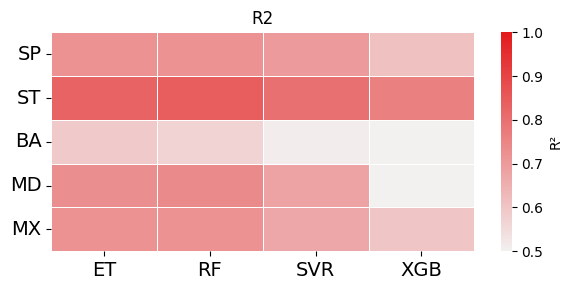

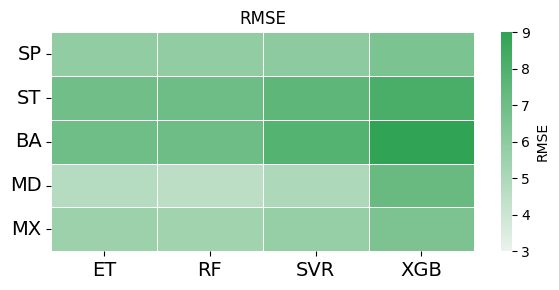

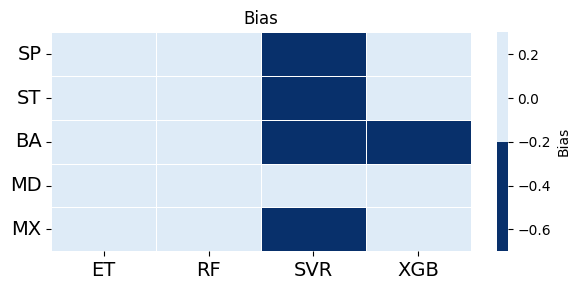

In [20]:
#Similar a lo anterior pero con otros resultados del modelo
#Cross validation aleatorio
import pandas as pd

data_cv_espacial = pd.DataFrame({
    "City": [
        "SP","SP","SP","SP",
        "ST","ST","ST","ST",
        "BA","BA","BA","BA",
        "MD","MD","MD","MD",
        "MX","MX","MX","MX"
    ],
    "Model": [
        "SVR","RF","ET","XGB",
        "SVR","RF","ET","XGB",
        "SVR","RF","ET","XGB",
        "SVR","RF","ET","XGB",
        "SVR","RF","ET","XGB"
    ],
    "R2": [
        0.70,0.72,0.72,0.61,
        0.80,0.84,0.83,0.76,
        0.51,0.57,0.59,0.25,
        0.68,0.74,0.73,0.30,
        0.67,0.72,0.72,0.60
    ],
    "RMSE": [
        6.04,5.89,5.92,6.57,
        7.54,7.03,6.92,8.18,
        7.81,7.03,6.97,9.46,
        4.97,4.57,4.74,7.22,
        5.76,5.41,5.53,6.54
    ],
    "Bias": [
        -0.67,0.09,0.09,0.44,
        -0.71,0.30,0.15,0.36,
        -0.41,0.30,0.28,-0.70,
        0.53,0.08,0.06,-0.06,
        -0.58,0.15,0.18,0.87
    ]
})

#################################################
#  ------ R2 ------
#### Fultrado de datos
heatmap_r2 = (
    data_cv_espacial
    .pivot(index="City", columns="Model", values="R2")
    .reindex(city_order)
)
#Plot
plt.figure(figsize=(6, 3))
sns.heatmap(
    heatmap_r2,
    cmap=sns.light_palette("#e31a1c", as_cmap=True),
    vmin=0.5, vmax=1,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "R²"}
)
plt.title("R2")
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()


#################################################
#  ------ RMSE ------

heatmap_rmse = (
    data_cv_espacial
    .pivot(index="City", columns="Model", values="RMSE")
    .reindex(city_order)
)

plt.figure(figsize=(6, 3))
sns.heatmap(
    heatmap_rmse,
    cmap=sns.light_palette("#31a354", as_cmap=True),
    vmin=3, vmax=9,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "RMSE"}
)
plt.title("RMSE")
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()


#################################################
#  ------ Bias ------

#Plot del bias
heatmap_bias = (
    data_cv_espacial
    .pivot(index="City", columns="Model", values="Bias")
    .reindex(city_order)
)

plt.figure(figsize=(6, 3))
sns.heatmap(
    heatmap_bias,
    cmap=sns.color_palette(["#08306b", "#deebf7"], as_cmap=True),
    vmin=-0.7, vmax=0.3,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Bias"}
)

plt.title("Bias")
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()


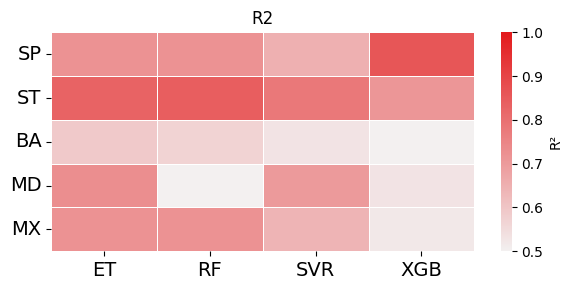

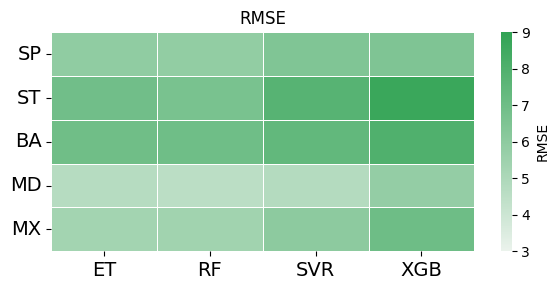

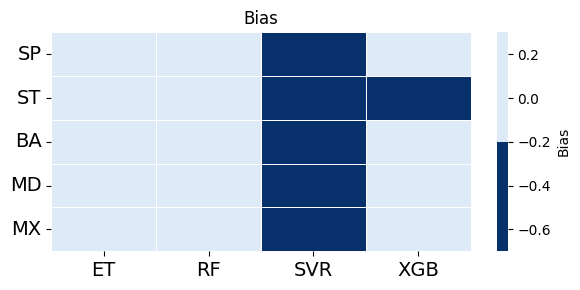

In [19]:
#Similar a lo anterior pero con otros resultados del modelo
#Cross validation temporal

data_cv_temporal = pd.DataFrame({
    "City": [
        "SP","SP","SP","SP",
        "ST","ST","ST","ST",
        "BA","BA","BA","BA",
        "MD","MD","MD","MD",
        "MX","MX","MX","MX"
    ],
    "Model": [
        "SVR","RF","ET","XGB",
        "SVR","RF","ET","XGB",
        "SVR","RF","ET","XGB",
        "SVR","RF","ET","XGB",
        "SVR","RF","ET","XGB"
    ],
    "R2": [
        0.65,0.72,0.72,0.86,
        0.78,0.84,0.83,0.71,
        0.53,0.57,0.59,0.44,
        0.70,0.44,0.73,0.53,
        0.64,0.72,0.72,0.52
    ],
    "RMSE": [
        6.46,5.88,5.93,6.47,
        7.77,6.67,6.93,8.71,
        7.41,6.99,6.98,8.01,
        4.79,4.57,4.73,5.80,
        6.04,5.40,5.33,7.04
    ],
    "Bias": [
        -0.75,0.07,0.09,0.03,
        -0.81,0.12,0.18,-0.21,
        -0.95,0.29,0.27,-0.04,
        -0.51,0.08,0.06,0.03,
        -0.65,0.14,0.17,-0.14
    ]
})

#################################################
#  ------ R2 ------
#### Fultrado de datos
heatmap_r2 = (
    data_cv_temporal
    .pivot(index="City", columns="Model", values="R2")
    .reindex(city_order)
)
#Plot
plt.figure(figsize=(6, 3))
sns.heatmap(
    heatmap_r2,
    cmap=sns.light_palette("#e31a1c", as_cmap=True),
    vmin=0.5, vmax=1,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "R²"}
)
plt.title("R2")
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()


#################################################
#  ------ RMSE ------

heatmap_rmse = (
    data_cv_temporal
    .pivot(index="City", columns="Model", values="RMSE")
    .reindex(city_order)
)

plt.figure(figsize=(6, 3))
sns.heatmap(
    heatmap_rmse,
    cmap=sns.light_palette("#31a354", as_cmap=True),
    vmin=3, vmax=9,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "RMSE"}
)
plt.title("RMSE")
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()


#################################################
#  ------ Bias ------

#Plot del bias
heatmap_bias = (
    data_cv_temporal
    .pivot(index="City", columns="Model", values="Bias")
    .reindex(city_order)
)

plt.figure(figsize=(6, 3))
sns.heatmap(
    heatmap_bias,
    cmap=sns.color_palette(["#08306b", "#deebf7"], as_cmap=True),
    vmin=-0.7, vmax=0.3,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Bias"}
)

plt.title("Bias")
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
#Comparativa entre lso 3modelos
#Seteamos algunas configuracion previas para generar los plots
city_order = ["SP", "ST", "BA", "MD", "MX"]
model_order = ["SVR", "RF", "ET", "XGB"]
cv_order = ["Random", "Espacial", "Temporal"]

#Nombres de los enfoques
data_cv_random["CV"] = "Random"
data_cv_espacial["CV"] = "Espacial"
data_cv_temporal["CV"] = "Temporal"

#Unir los tres datset
data_all = pd.concat(
    [data_cv_random, data_cv_espacial, data_cv_temporal],
    ignore_index=True
)

# Los ordenamos para mostrar mejor las metricas
data_all["CV"] = pd.Categorical(data_all["CV"], cv_order)
data_all["City"] = pd.Categorical(data_all["City"], city_order)
data_all.head()

,City,Model,R2,RMSE,Bias,CV
0,SP,SVR,0.69,6.06,-0.68,Random
1,SP,RF,0.71,5.94,0.11,Random
2,SP,ET,0.72,5.92,0.10,Random
3,SP,XGB,0.72,5.74,-0.11,Random
4,ST,SVR,0.82,7.12,-0.53,Random


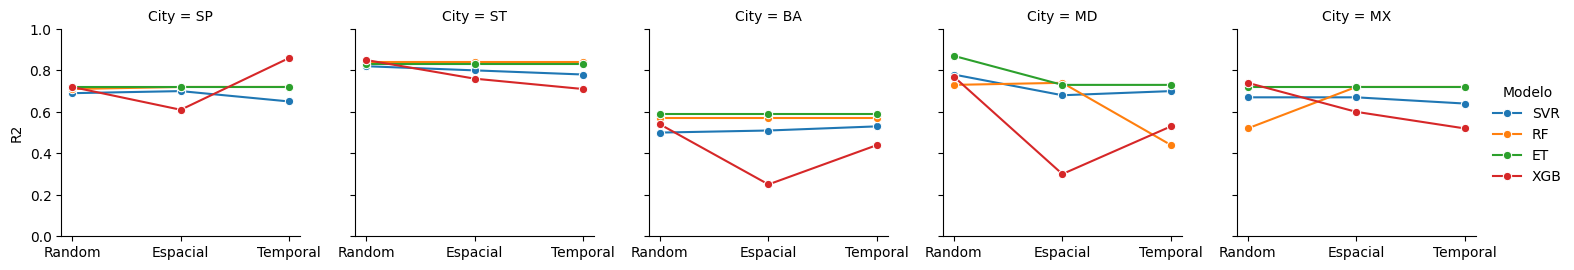

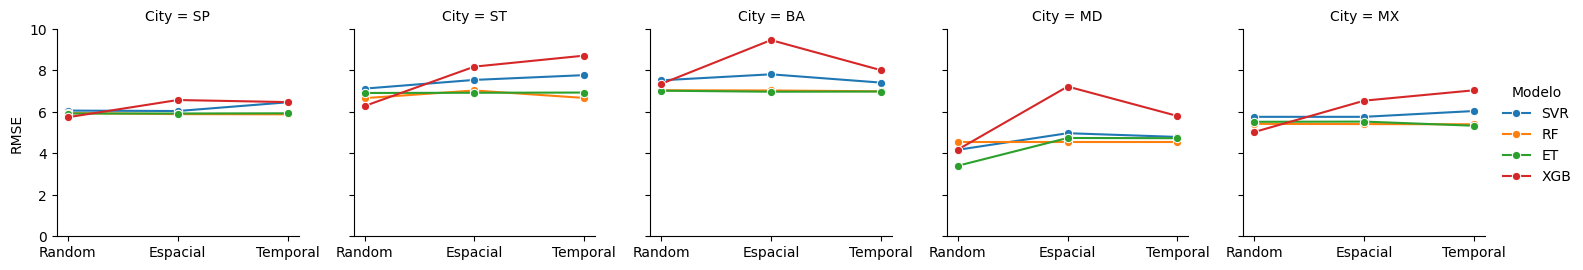

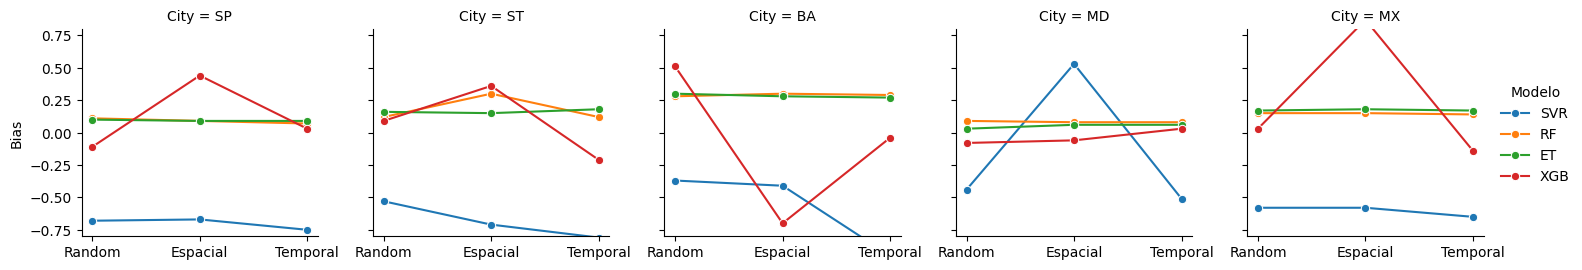

In [ ]:
#Funcion para hacer los plots todos igales
def plot_metric_lines(df, metric, ylim):
    g = sns.FacetGrid(
        df, col="City", col_wrap=5,
        height=3, sharey=True
    )
    g.map_dataframe(
        sns.lineplot,
        x="CV", y=metric,
        hue="Model", marker="o"
    )

    g.set_axis_labels("", metric)
    g.set(ylim=ylim)
    g.add_legend(title="Modelo")
    plt.show()

#Plotear distintas metricas
plot_metric_lines(data_all, "R2", (0, 1))
plot_metric_lines(data_all, "RMSE", (0, 10))
plot_metric_lines(data_all, "Bias", (-0.80, 0.8))
